
**ВЫЯВЛЕНИЕ НА РАННЕЙ СТАДИИ БОЛЕЗНИ АЛЬЦГЕЙМЕРА С ПОМОЩЬЮ МРТ ДАННЫХ И МАШИННОГО ОБУЧЕНИЯ** 

Данные получены  из Kaggle которые были созданы в рамках проекта Open Access Series of Imaging Studies (OASIS). 
Cостоит из данных МРТ 373 людей в возрасте от 60 до 96 лет. Все они являются правшами.

Цель:  разработать программу, которая поможет врачам предсказать раннюю болезнь Альцгеймера



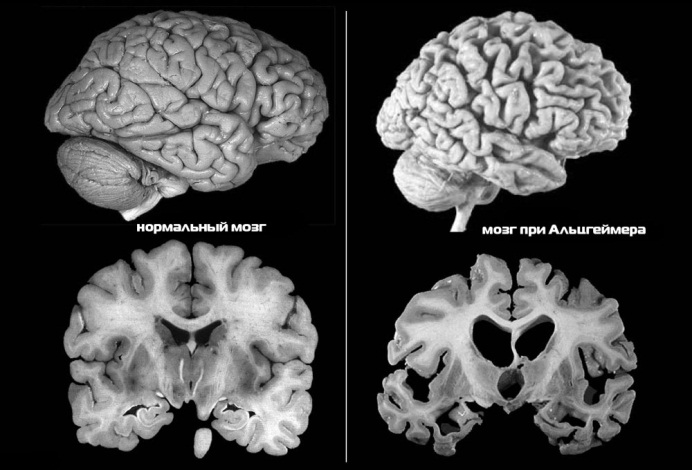

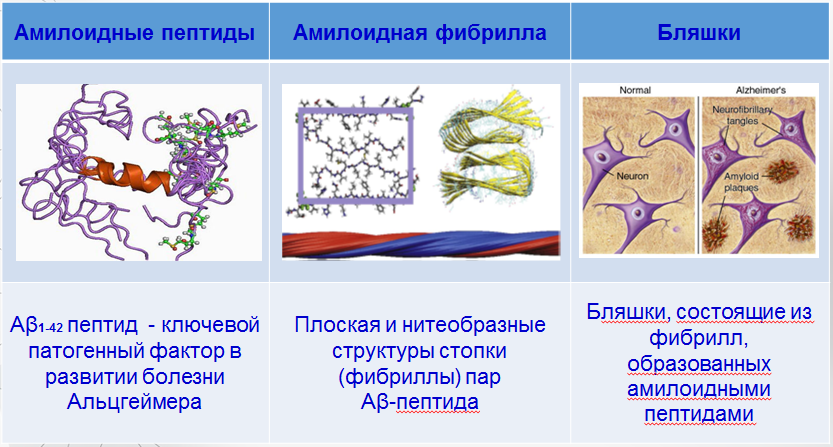

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/longitudinal.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
data['M/F'] = data['M/F'].replace(['F','M'], [0,1])
data['Group'] = data['Group'].replace(['Converted'], ['Demented']) 
data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) 
data = data.drop(['MRI ID', 'Visit', 'Hand'], axis=1) 

In [5]:
data.rename(columns={'M/F': 'M_F'}, inplace=True)

In [6]:
data=data.drop(['Subject ID','MMSE','SES'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    int64  
 1   MR Delay  373 non-null    int64  
 2   M_F       373 non-null    int64  
 3   Age       373 non-null    int64  
 4   EDUC      373 non-null    int64  
 5   CDR       373 non-null    float64
 6   eTIV      373 non-null    int64  
 7   nWBV      373 non-null    float64
 8   ASF       373 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 26.4 KB


In [9]:
data.head(5)


,Group,MR Delay,M_F,Age,EDUC,CDR,eTIV,nWBV,ASF
0,0,0,1,87,14,0.0,1987,0.696,0.883
1,0,457,1,88,14,0.0,2004,0.681,0.876
2,1,0,1,75,12,0.5,1678,0.736,1.046
3,1,560,1,76,12,0.5,1738,0.713,1.010
4,1,1895,1,80,12,0.5,1698,0.701,1.034


In [10]:
def bar_chart(feature):
    Demented = data[data['Group']==1][feature].value_counts()
    Nondemented = data[data['Group']==0][feature].value_counts()
    data_bar = pd.DataFrame([Demented,Nondemented])
    data_bar.index = ['Demented','Nondemented']
    data_bar.plot(kind='bar',stacked=True, figsize=(6,5))

Text(0.5, 1.0, 'Пол и деменция')

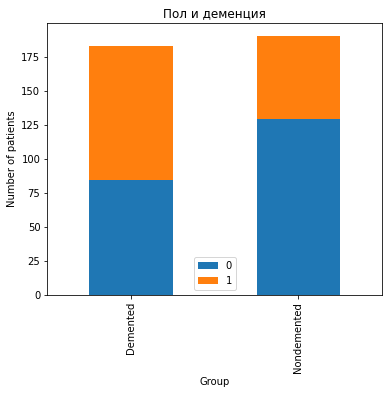

In [11]:
# Пол и Группа (женщина=0, мужчина=1)
bar_chart('M_F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Пол и деменция')


Приведенный выше график показывает, что мужчины чаще страдают деменцией, чем женщины.

(0.6, 0.9)

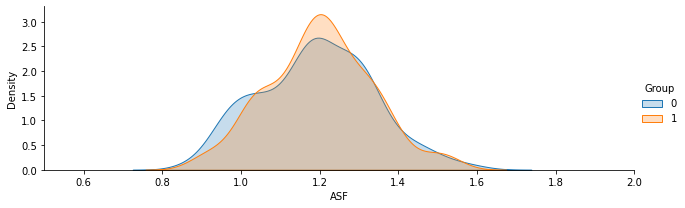

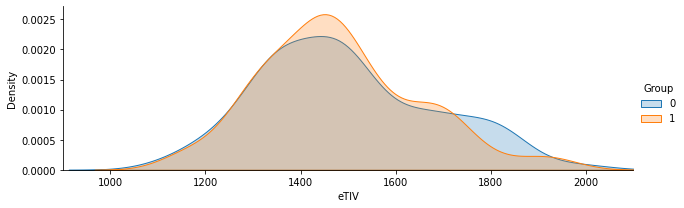

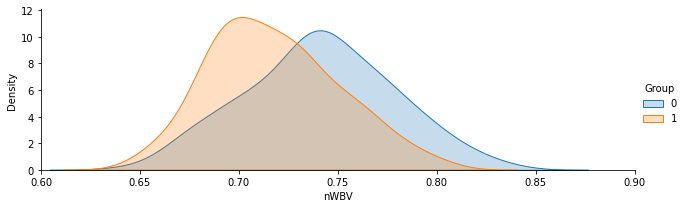

In [12]:
#bar_chart('ASF') = Atlas Scaling Factor (ASF представляет собой расширение (или сокращение) объема всего мозга)
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, data['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume (Расчетный общий внутричерепной объем)
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, data['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume (Нормализация объемов головного мозга с использованием внутричерепного объема)
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, data['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

Эти диаграммы показывают, что группа без деменции имеет более высокий коэффициент объема мозга, чем группа с деменцией. Предполагается, что это связано с тем, что болезни влияют на мозг, уменьшая его ткань.

(50.0, 100.0)

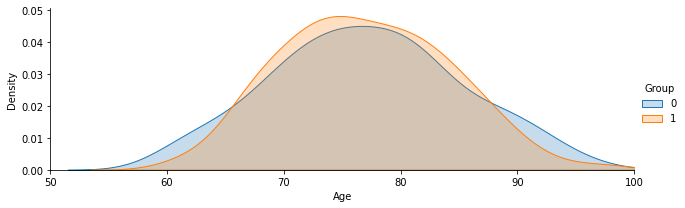

In [13]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

В группе пациентов с более высокой деменцией наблюдается в возрасте 70-80 лет. Мы предполагаем, что пациенты, страдавшие этим заболеванием, имеют более низкую выживаемость, но встречаются единичные случаи выживаемости до 90 лет.

(0.0, 0.16)

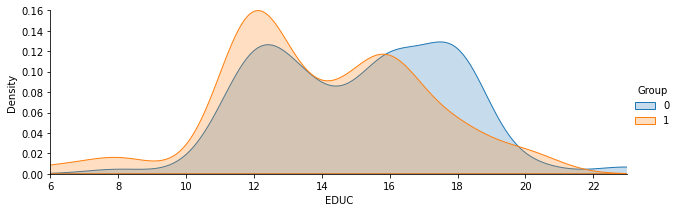

In [14]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(data['EDUC'].min(), data['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)


Опираясь на промежуточные результаты исследования можно сделать следующие выводы:
1. Мужчины чаще страдают деменцией, чем женщины.
2. Пациенты с деменцией были меньше образованны с точки зрения количества лет обучения.
3. Группа без деменции имеет большой объем мозга, чем группа с деменцией.
4. Группе пациентов с более высокой деменцией наблюдается в возрасте 70-80 лет.

In [15]:
y = data['Group']
X = data[['Age', 'EDUC', 'eTIV', 'nWBV', 'ASF','CDR']]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler 
#from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [17]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
X_train

,Age,EDUC,eTIV,nWBV,ASF,CDR
136,78,8,1462,0.691,1.200,1.0
113,84,16,1500,0.744,1.170,0.0
158,75,14,1507,0.782,1.164,0.0
350,70,14,1510,0.770,1.162,0.0
114,85,18,1264,0.701,1.388,0.0
...,...,...,...,...,...,...
323,78,12,1569,0.704,1.119,1.0
192,75,12,1511,0.739,1.162,0.0
117,67,13,1365,0.827,1.285,0.0
47,69,12,1365,0.783,1.286,0.0


In [19]:
X_test

,Age,EDUC,eTIV,nWBV,ASF,CDR
45,82,12,1420,0.713,1.236,0.5
272,67,12,1331,0.761,1.318,0.0
54,80,12,1390,0.735,1.263,0.0
236,75,13,1520,0.708,1.155,0.5
253,74,11,1517,0.705,1.157,0.0
...,...,...,...,...,...,...
164,69,18,1536,0.719,1.143,0.0
301,77,13,1351,0.769,1.299,0.0
186,80,12,1494,0.661,1.175,1.0
17,66,12,1447,0.769,1.213,0.5


In [20]:
X.head()

,Age,EDUC,eTIV,nWBV,ASF,CDR
0,87,14,1987,0.696,0.883,0.0
1,88,14,2004,0.681,0.876,0.0
2,75,12,1678,0.736,1.046,0.5
3,76,12,1738,0.713,1.010,0.5
4,80,12,1698,0.701,1.034,0.5


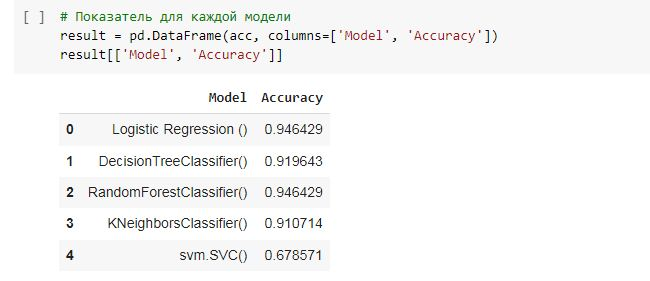

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier()

In [ ]:
## Prediction
y_pred=classifier.predict(X_test)

In [ ]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [ ]:
score

0.9464285714285714

In [ ]:
print("деменция:", classifier.predict([[88, 14, 2004, 0.681, 0.876, 0.0]]))
print("деменция:", classifier.predict([[75, 12, 1678, 0.736, 1.046, 0.5]]))

деменция: [0]
деменция: [1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
pickle_out=open("demention.pkl", "wb")

In [ ]:
pickle.dump(classifier, pickle_out)

In [ ]:
pickle_out.close()